In [36]:
import yfinance as yf

In [37]:
# 삼전 코드
samsung = yf.download('005930.KS',start='2022-01-01',end='2023-03-12')

samsung = samsung[['Close']]
samsung.reset_index(inplace=True)
samsung = samsung.rename(columns={'Close':'Price'})
samsung.head(3)

[*********************100%***********************]  1 of 1 completed


,Date,Price
0,2022-01-04,78700.0
1,2022-01-05,77400.0
2,2022-01-06,76900.0


<AxesSubplot:xlabel='Date'>

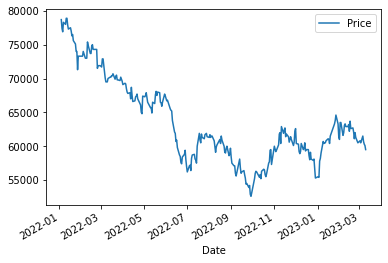

In [38]:
samsung.plot(x='Date',y='Price',kind='line')

In [39]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [40]:
# ARIMA model 생성
model = ARIMA(samsung.Price.values, order=(2,1,2))
# order의 파라미터는 (AR,Difference,MA)
# AR : AR이 몇 번째 과거까지 바라보는지에 대한 파라미터
# DIfference : 차분
# MA : MA가 몇 번째 과거까지 바라보는지에 대한 파라미터

fit = model.fit()
# 생성 모델에 대한 summary 확인
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  291
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2388.172
Date:                Sun, 12 Mar 2023   AIC                           4786.343
Time:                        21:54:23   BIC                           4804.693
Sample:                             0   HQIC                          4793.695
                                - 291                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9076      0.343     -2.648      0.008      -1.579      -0.236
ar.L2         -0.6098      0.414     -1.474      0.140      -1.421       0.201
ma.L1          0.8756      0.376      2.330      0.020       0.139       1.612
ma.L2          0.5612      0.451      1.244      0.213      -0.323       1.445
sigma2      8.417e+05   6.16e+04     13.672      0.000    7.21e+05    9.62e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                15.77
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                             0.34
Prob(H) (two-sided):                  0.31   Kurtosis:                         3.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

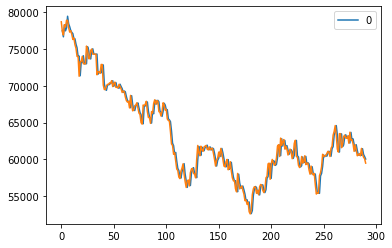

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

pred = pd.DataFrame(fit.predict())
pred[1:].plot()
samsung['Price'].plot()

<AxesSubplot:>

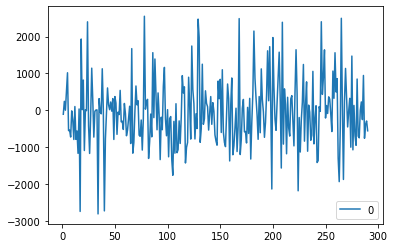

In [42]:
residuals = pd.DataFrame(fit.resid)
residuals[1:].plot()

In [43]:
# 예측치
forecast = fit.forecast(steps=10)
forecast

array([59515.56189214, 59554.72868909, 59509.69030061, 59526.68469357,
       59538.72424919, 59517.43374875, 59529.41593749, 59531.52339229,
       59522.30394588, 59529.38665214])

In [44]:
# 실측치
forecasts = yf.download('005930.KS',start='2022-12-01',end='2022-12-10')
print(forecasts['Close'].values)

[*********************100%***********************]  1 of 1 completed
[62600. 60400. 60300. 59200. 58900. 59200. 60400.]


<AxesSubplot:xlabel='Date'>

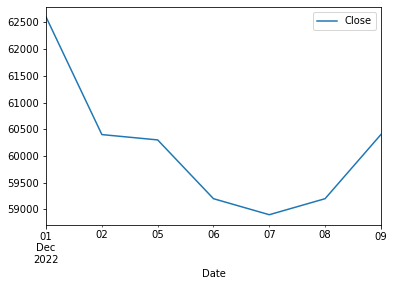

In [45]:
forecasts.plot(xlabel='Date',y='Close',kind='line')

In [46]:
forecasts

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-01,63100.0,63200.0,62300.0,62600.0,62211.039062,16631445
2022-12-02,62500.0,62500.0,60400.0,60400.0,60024.710938,15331184
2022-12-05,60900.0,61100.0,60000.0,60300.0,59925.332031,13767787
2022-12-06,59800.0,60100.0,59200.0,59200.0,58832.164062,13888300
2022-12-07,58800.0,59600.0,58500.0,58900.0,58534.027344,12100662
2022-12-08,58700.0,59200.0,58600.0,59200.0,58832.164062,12986815
2022-12-09,59300.0,60600.0,59300.0,60400.0,60024.710938,10529632


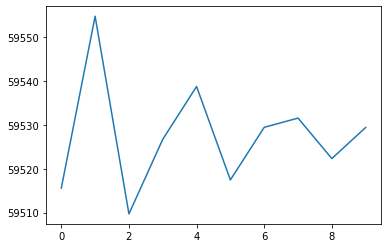

In [47]:
plt.plot(forecast)